## Importing Required Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd

## Loading the Dataset

In [ ]:
dataset =pd.read_csv("Star.csv")

In [ ]:
dataset

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


## Preparing the Dataset

In [ ]:
dataset = dataset.drop('SpType', axis=1)

In [ ]:
X = dataset.drop(columns=['TargetClass'])
y = dataset['TargetClass']

## Splitting dataset into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.425, random_state=42)

## Data Type Conversion

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

## Replacing Null Values

In [ ]:
dataset.replace('NA', np.nan, inplace=True)

columns_with_na = dataset.columns[dataset.isnull().any()]
print("Columns with missing values:", columns_with_na)

Columns with missing values: Index([], dtype='object')


## Normalization

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

## Creating a Neural Network Model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(5,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

## Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=30, validation_split=0.175)

Epoch 1/25
58/58 [==============================] - 1s 6ms/step - loss: 0.4080 - accuracy: 0.8749 - val_loss: 0.2700 - val_accuracy: 0.9128
Epoch 2/25
58/58 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8992 - val_loss: 0.2643 - val_accuracy: 0.9101
Epoch 3/25
58/58 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9010 - val_loss: 0.2648 - val_accuracy: 0.9155
Epoch 4/25
58/58 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.9033 - val_loss: 0.2560 - val_accuracy: 0.9183
Epoch 5/25
58/58 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.9016 - val_loss: 0.2548 - val_accuracy: 0.9128
Epoch 6/25
58/58 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.9016 - val_loss: 0.2524 - val_accuracy: 0.9183
Epoch 7/25
58/58 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.9027 - val_loss: 0.2577 - val_accuracy: 0.9101
Epoch 8/25
58/58 [==

## Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

49/49 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8857
Test accuracy: 0.8856589198112488


In [ ]:
predictions = model.predict(X_test)

49/49 [==============================] - 0s 1ms/step


## Visualizing Training Progress:

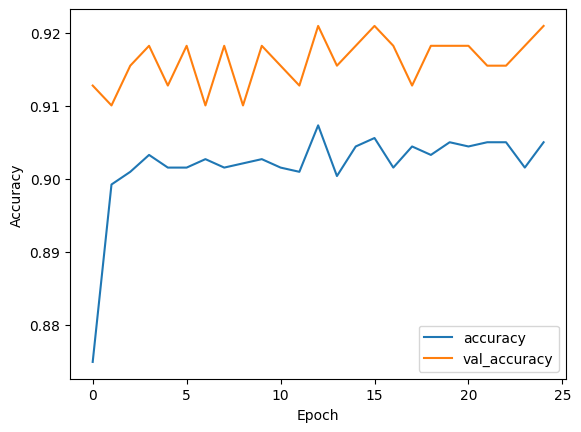

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
